### Multiple Variable Linear Regression
Mutiple variable linear regression, a type of problem where the target variable depends on multiple input variables


### Problem statement
We take an example of house price prediction.  Training example will have prices and size, bedrooms,floors and age of 3 houses as given below


| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  


We will try to build the linear regression model to predict the housing price given size,number of bedrooms, floors and age of house.


In [2]:
import numpy as np
import pandas as pd
x_train = np.array([[2104,5,1,45],[1416,3,2,40],[852,2,1,35]])
y_train = np.array([460,232,178])

In [3]:
print(x_train)
print(y_train)

[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
[460 232 178]


In [4]:
print(x_train.shape)
print(y_train.shape)

(3, 4)
(3,)


### Multivariable model 

The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2)

In [5]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


In [6]:
## Model predict function
def predict_using_looping(x,w,b):
    m = x.shape[0]
    p = 0
    for i in range(m):
        p_i = x[i] * w[i]
        p = p + p_i
    return p + b


In [7]:
## predict the value for the first example

# get a row from our training data
x_vec = x_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_using_looping(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


### Predict the value using the dot product

In [8]:
def predict_dot_product(x,w,b):
    return np.dot(x,w) + b ## Dot product

In [9]:
# get a row from our training data
x_vec = x_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_dot_product(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


### Cost function for multiple variable regression 
equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


 $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [10]:
def compute_cost(x_train,w,b,y_train):
    m = x_train.shape[0]
    j_wb = 0.0
    for i in range(m):
        j_wb_i = ((np.dot(x_train[i,:],w) + b) - y_train[i])**2
        j_wb = j_wb + j_wb_i
    return j_wb / (2*m)
    

In [11]:
cost = compute_cost(x_train,w_init,b_init,y_train)
print(cost)

1.5578904045996674e-12


### Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


## 5.1 Compute Gradient with Multiple Variables
An implementation for calculating the equations (6) and (7) is below. There are many ways to implement this. In this version, there is an
- outer loop over all m examples. 
    - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ for the example can be computed directly and accumulated
    - in a second loop over all n features:
        - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ is computed for each $w_j$.

In [12]:
def compute_gradient(X, y, w, b):
    total_training_set = X.shape[0]
    total_features = X.shape[1]
    dj_dw = np.zeros(total_features)
    dj_db = 0
    for i in range(total_training_set):
        err = np.dot(X[i], w) + b - y[i]
        for j in range(total_features):
            dj_dw[j] =  dj_dw[j]  + err * X[i,j]
        dj_db = dj_db + err
    return dj_dw/total_training_set , dj_db/total_training_set 

In [13]:
dj_dw_iter, dj_db_iter = compute_gradient(x_train,y_train,w_init,b_init)
print(f"Value of dj_db_iter = {dj_dw_iter}")
print(f"Value of dj_db_iter = {dj_db_iter}")

Value of dj_db_iter = [-2.72623574e-03 -6.27197255e-06 -2.21745574e-06 -6.92403377e-05]
Value of dj_db_iter = -1.6739251122999121e-06


### Gradient Descent With Multiple Variables
The routine below implements equation (5) above.

In [25]:
import copy, math
def gradient_descent(x_train,y_train, w_init,b_init,compute_cost,compute_gradient,iterations, alpha):
    J_history = []
    size_of_training_set = x_train.shape[0]
    w = copy.deepcopy(w_init)
    b = b_init
    for i in range(0,iterations):
        gradient = compute_gradient(x_train, y_train,w,b)
        w = w - alpha * gradient[0]
        b = b - alpha * gradient[1]
        if i < 10000:
            J_history.append(compute_cost(x_train,w,b,y_train))
        if i % math.ceil(iterations / 10) ==0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
    return w,b ,J_history
        
        
        

In [41]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 100000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    iterations,alpha )
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46   
Iteration 10000: Cost   624.83   
Iteration 20000: Cost   624.83   
Iteration 30000: Cost   624.83   
Iteration 40000: Cost   624.83   
Iteration 50000: Cost   624.83   
Iteration 60000: Cost   624.83   
Iteration 70000: Cost   624.83   
Iteration 80000: Cost   624.83   
Iteration 90000: Cost   624.83   
b,w found by gradient descent: -0.04,[ 0.24224154  0.28821169 -0.85520022 -1.57622854] 
prediction: 439.29, target value: 460
prediction: 279.08, target value: 232
prediction: 150.90, target value: 178


Text(0.5, 1.0, 'Cost vs iteration of GD')

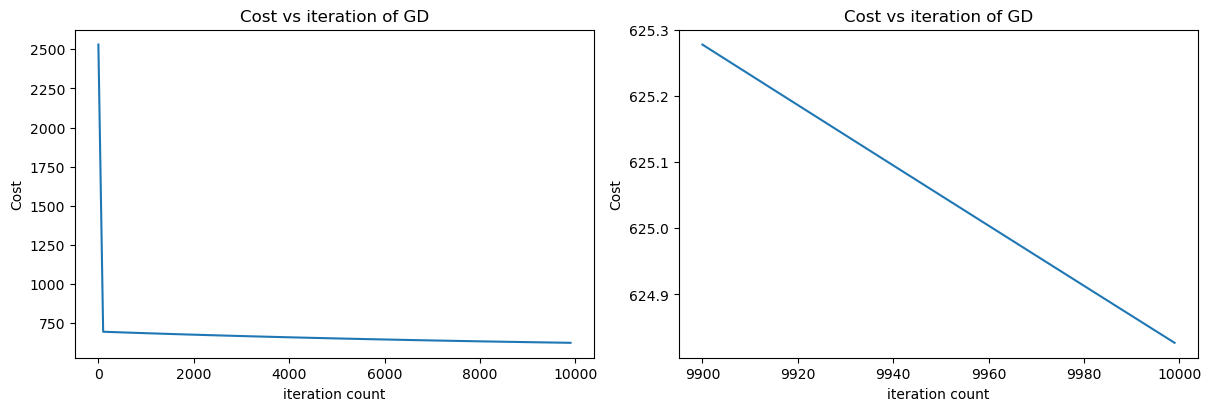

In [45]:
import matplotlib.pyplot as plt
fig,(ax1,ax2) = plt.subplots(1,2,constrained_layout=True, figsize=(12, 4))
ax1.plot(np.arange(0,len(J_hist),100),J_hist[::100])
ax1.set_xlabel("iteration count")
ax1.set_ylabel("Cost")
ax1.set_title("Cost vs iteration of GD")
ax2.plot( np.arange(len(J_hist) - 100, len(J_hist)), J_hist[9900:])
ax2.set_xlabel("iteration count")
ax2.set_ylabel("Cost")
ax2.set_title("Cost vs iteration of GD")
